# AIRP2 Recurrent Neural Networks


## Objective
- Build RNN models in Keras
- RNN architecture design
- Tune paramters of RNN models

## Project 2

- **Modify** RNN model in RNN-1 by using different
    - sequence length
    - simpleRNN/LSTM layers
    - number of units
    - pretrained weigths
    - drop out rate
    - number of dense layers
    - number of units of dense layers
    - optimizer
    - learning rate
    - batch size
    - epoch
    - Use test data as validation data (increase the training data)
- **Plot** the performance history of different models
- **Analyze** the effect of structure/hyper-parameters of RNN
- **Summarize** the best model with the best performance of test data for **competition** in class. The competition is based on three criteria, accuracy, timing, and code efficiency.
- Name your program AIRP2_StudentName_Project2. Submit ipynb version of your Project2 codes to PolyMall.

In [ ]:
import numpy as np
import pandas as pd

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from sklearn import preprocessing

import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import initializers
import matplotlib.pyplot as plt




from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
df_bookdata = pd.read_csv('gutenberg_metadata.csv')

In [ ]:
df_bookdata.head(5)

,Title,Author,Link,Bookshelf
0,The Extermination of the American Bison,William T. Hornaday,http://www.gutenberg.org/ebooks/17748,Animal
1,Deadfalls and Snares,A. R. Harding,http://www.gutenberg.org/ebooks/34110,Animal
2,Artistic Anatomy of Animals,Édouard Cuyer,http://www.gutenberg.org/ebooks/38315,Animal
3,"Birds, Illustrated","Color Photography, Vol. 1, No. 1 Various",http://www.gutenberg.org/ebooks/30221,Animal
4,On Snake-Poison: Its Action and Its Antidote,A. Mueller,http://www.gutenberg.org/ebooks/32947,Animal


In [ ]:
df_bookdata.columns

Index(['Title', 'Author', 'Link', 'Bookshelf'], dtype='object')

In [ ]:
df_bookdata.loc[50:60, :]

,Title,Author,Link,Bookshelf
50,The Life of the Spider,Jean-Henri Fabre,http://www.gutenberg.org/ebooks/1887,Animals-Wild
51,Artistic Anatomy of Animals,Édouard Cuyer,http://www.gutenberg.org/ebooks/38315,Animals-Wild
52,A Guide for the Study of Animals,"Lucas, Shinn, Smallwood, and Whitney",http://www.gutenberg.org/ebooks/34984,Animals-Wild
53,Our Vanishing Wild Life: Its Extermination and...,William T. Hornaday,http://www.gutenberg.org/ebooks/13249,Animals-Wild
54,Ways of Nature,John Burroughs,http://www.gutenberg.org/ebooks/30249,Animals-Wild
55,The Human Side of Animals,Royal Dixon,http://www.gutenberg.org/ebooks/19850,Animals-Wild
56,"The Wonders of the Jungle, Book One",Sarath Kumar Ghosh,http://www.gutenberg.org/ebooks/24852,Animals-Wild
57,"Zoological Mythology; or, The Legends of Anima...",De Gubernatis,http://www.gutenberg.org/ebooks/38687,Animals-Wild
58,Wild Animals at Home,Ernest Thompson Seton,http://www.gutenberg.org/ebooks/27887,Animals-Wild
59,Ways of Wood Folk,William J. Long,http://www.gutenberg.org/ebooks/18193,Animals-Wild


In [ ]:
print(df_bookdata['Bookshelf'].unique())


['Animal' 'Animals-Domestic' 'Animals-Wild' 'Animals-Wild-Trapping'
 'Animals-Wild-Birds' 'Animals-Wild-Insects' 'Animals-Wild-Mammals'
 'Animals-Wild-Reptiles' 'Canada' "Children's" 'School' "Child's"
 'Harvard' 'Classical' '6' 'Travel' 'Christmas' 'Italy' 'United' 'Norway'
 'Bulgaria' 'Argentina' 'South' "Women's" 'New' 'France' 'Greece'
 'Germany' 'Australia' 'Egypt' 'India' 'Africa' 'Crime' 'Mystery'
 'Detective' 'Language' 'Education' 'General' 'Romantic' 'FR' 'Western'
 'Erotic' 'Fantasy' 'Humor' 'Adventure' 'Science' 'Precursors' 'Horror'
 'Historical' 'Gothic' 'The' 'Architecture' 'Art' 'Reference' 'IT' 'Czech'
 'Maps' 'Camping' 'CIA' 'Anthropology' 'Folklore' 'Current' 'Natural'
 'Archaeology' 'Biographies' 'German' 'Canon' 'Noteworthy' 'British'
 'Music' 'Opera' 'Bibliomania' 'Witchcraft' 'Psychology' 'Philosophy'
 "Bahá'í" 'Islam' 'Buddhism' 'Latter' 'Hinduism' 'Atheism' 'Paganism'
 'Mythology' 'Judaism' 'Christianity' 'Geology' 'Mycology' 'Microscopy'
 'Journal' 'Microbiolo

In [ ]:
df_bookdata['Bookshelf'].nunique()

118

In [ ]:
df_bookdata['Bookshelf']= df_bookdata.Bookshelf.replace(dict.fromkeys(['Animal','Animals-Domestic','Animals-Wild','Animals-Wild-Trapping','Animals-Wild-Mammals'], 'Micheal'))

In [ ]:
df_bookdata['Bookshelf']= df_bookdata.Bookshelf.replace(dict.fromkeys(["Children's","Child's"], 'Children'))

In [ ]:
df_bookdata.loc[df_bookdata['Bookshelf'] == '6']

,Title,Author,Link,Bookshelf
500,Don Quijote,Miguel de Cervantes Saavedra,http://www.gutenberg.org/ebooks/2000,6
501,"The History of Don Quixote, Volume 1, Complete",Miguel de Cervantes Saavedra,http://www.gutenberg.org/ebooks/5921,6
502,The Life of Lazarillo de Tormes,Anonymous,http://www.gutenberg.org/ebooks/53489,6
503,"The History of Don Quixote, Volume 2, Complete",Miguel de Cervantes Saavedra,http://www.gutenberg.org/ebooks/5946,6
504,"Legends, Tales and Poems",Gustavo Adolfo Bécquer,http://www.gutenberg.org/ebooks/10814,6
505,Niebla (Nivola),Miguel de Unamuno,http://www.gutenberg.org/ebooks/49836,6
506,Fortunata y Jacinta: dos historias de casadas,Benito Pérez Galdós,http://www.gutenberg.org/ebooks/17013,6
507,La Celestina,Fernando de Rojas,http://www.gutenberg.org/ebooks/1619,6
508,La Regenta,Leopoldo Alas,http://www.gutenberg.org/ebooks/17073,6
509,Vida De Lazarillo De Tormes Y De Sus Fortunas ...,Anonymous,http://www.gutenberg.org/ebooks/320,6


In [ ]:
df_bookdata.loc[df_bookdata["Bookshelf"] == "6", "Bookshelf"] = 'Historical'

In [ ]:
df_bookdata.tail(10)

,Title,Author,Link,Bookshelf
15321,Unbegotten Child,Winston K. Marks,http://www.gutenberg.org/ebooks/32149,NaN
15322,A Transmutation of Muddles,H. B. Fyfe,http://www.gutenberg.org/ebooks/24187,NaN
15323,The Marooner,Charles A. Stearns,http://www.gutenberg.org/ebooks/24791,NaN
15324,Disturbing Sun,Robert S. Richardson,http://www.gutenberg.org/ebooks/24150,NaN
15325,Untechnological Employment,Ed M. Clinton,http://www.gutenberg.org/ebooks/23147,NaN
15326,Psichopath,Randall Garrett,http://www.gutenberg.org/ebooks/30304,NaN
15327,Poisoned Air,S. P. Meek,http://www.gutenberg.org/ebooks/29069,NaN
15328,Cry from a Far Planet,Tom Godwin,http://www.gutenberg.org/ebooks/23799,NaN
15329,Spies Die Hard!,Arnold Marmor,http://www.gutenberg.org/ebooks/30383,NaN
15330,The Doomsman,Van Tassel Sutphen,http://www.gutenberg.org/ebooks/27730,NaN


In [ ]:
df_bookdata['Bookshelf'] = df_bookdata['Bookshelf'].replace(np.nan, 'General')

In [ ]:
df_bookdata['Bookshelf'].nunique()

112

In [ ]:
print(df_bookdata['Bookshelf'].unique())


['Micheal' 'Animals-Wild-Birds' 'Animals-Wild-Insects'
 'Animals-Wild-Reptiles' 'Canada' 'Children' 'School' 'Harvard'
 'Classical' 'Historical' 'Travel' 'Christmas' 'Italy' 'United' 'Norway'
 'Bulgaria' 'Argentina' 'South' "Women's" 'New' 'France' 'Greece'
 'Germany' 'Australia' 'Egypt' 'India' 'Africa' 'Crime' 'Mystery'
 'Detective' 'Language' 'Education' 'General' 'Romantic' 'FR' 'Western'
 'Erotic' 'Fantasy' 'Humor' 'Adventure' 'Science' 'Precursors' 'Horror'
 'Gothic' 'The' 'Architecture' 'Art' 'Reference' 'IT' 'Czech' 'Maps'
 'Camping' 'CIA' 'Anthropology' 'Folklore' 'Current' 'Natural'
 'Archaeology' 'Biographies' 'German' 'Canon' 'Noteworthy' 'British'
 'Music' 'Opera' 'Bibliomania' 'Witchcraft' 'Psychology' 'Philosophy'
 "Bahá'í" 'Islam' 'Buddhism' 'Latter' 'Hinduism' 'Atheism' 'Paganism'
 'Mythology' 'Judaism' 'Christianity' 'Geology' 'Mycology' 'Microscopy'
 'Journal' 'Microbiology' 'Physiology' 'Ecology' 'Zoology' 'Astronomy'
 'Suffrage' 'Racism' 'Cookbooks' 'Technology' 'B

In [ ]:
df_processed= df_bookdata.groupby('Bookshelf').filter(lambda x: len(x)>1 )


In [ ]:
df_processed['Bookshelf'].nunique()

110

In [ ]:
df_processed.head()

,Title,Author,Link,Bookshelf
0,The Extermination of the American Bison,William T. Hornaday,http://www.gutenberg.org/ebooks/17748,Micheal
1,Deadfalls and Snares,A. R. Harding,http://www.gutenberg.org/ebooks/34110,Micheal
2,Artistic Anatomy of Animals,Édouard Cuyer,http://www.gutenberg.org/ebooks/38315,Micheal
3,"Birds, Illustrated","Color Photography, Vol. 1, No. 1 Various",http://www.gutenberg.org/ebooks/30221,Micheal
4,On Snake-Poison: Its Action and Its Antidote,A. Mueller,http://www.gutenberg.org/ebooks/32947,Micheal


In [ ]:
df_processed.tail()

,Title,Author,Link,Bookshelf
15326,Psichopath,Randall Garrett,http://www.gutenberg.org/ebooks/30304,General
15327,Poisoned Air,S. P. Meek,http://www.gutenberg.org/ebooks/29069,General
15328,Cry from a Far Planet,Tom Godwin,http://www.gutenberg.org/ebooks/23799,General
15329,Spies Die Hard!,Arnold Marmor,http://www.gutenberg.org/ebooks/30383,General
15330,The Doomsman,Van Tassel Sutphen,http://www.gutenberg.org/ebooks/27730,General


In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15329 entries, 0 to 15330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      15329 non-null  object
 1   Author     14133 non-null  object
 2   Link       15329 non-null  object
 3   Bookshelf  15329 non-null  object
dtypes: object(4)
memory usage: 598.8+ KB


In [ ]:
X = df_processed['Title']

In [ ]:
X.shape

(15329,)

In [ ]:
y = df_processed['Bookshelf']

In [ ]:
y.shape

(15329,)

In [ ]:
y.value_counts()


General     12601
Children      225
Micheal       125
FR             84
The            77
            ...  
Canon           3
English         3
Czech           3
Journal         2
Bulgaria        2
Name: Bookshelf, Length: 110, dtype: int64

In [ ]:
max_features = 20000
seq_length = 10 # How long to make our word sequences
batch_size = 32

In [ ]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)

In [ ]:
sequences_X = tokenizer.texts_to_sequences(X)


In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 10505 unique tokens.


In [ ]:
# the first 10 tokens
count = 0
for word,i in word_index.items():
    print (word, i)
    count = count + 1
    if (count == 10):
        break

the 1
of 2
and 3
a 4
in 5
volume 6
or 7
de 8
from 9
on 10


In [ ]:
print(type(sequences_X))

<class 'list'>


In [ ]:
X_array = np.array(sequences_X)

print(type(X_array))


<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
print(X_array.shape)

(15329,)


In [ ]:
X_array

array([list([1, 1237, 2, 1, 24, 2493]), list([4293, 3, 4294]),
       list([4295, 3469, 2, 115]), ..., list([3468, 9, 4, 754, 147]),
       list([3419, 184, 1580]), list([1, 7288])], dtype=object)

In [ ]:
X = pad_sequences(X_array, maxlen=seq_length)
print('shape of x',X.shape)

shape of x (15329, 10)


In [ ]:
X[5: 10 ,:]

array([[   0,    0,    0,    0,  477,   97,    4,  566,    3, 2494],
       [   0,    0,    0,    0,    0,    0,  197,  244,  198,  216],
       [   2,   35, 4297,   78,   12, 1778, 4298, 1238,    3, 2495],
       [   0,    0,    0,    4,  296,   19,    1,   87,    2,  115],
       [   0,    0,  128,  812,  174,   29,   96, 1237,    3, 1779]],
      dtype=int32)

In [ ]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([70, 70, 70, ..., 49, 49, 49])

In [ ]:
y = tf.keras.utils.to_categorical(np.asarray(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y.shape

(15329, 110)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=1010,shuffle=True,stratify=y)

**MODEL 1 : SIMPLE RNN (5 UNITS) , OPTIMIZER = RMSPROP(LEARNING RATE = O.OO2)**
MAX_FEATURES=20000
SEQ_LENGTH = 10
BATCH_SIZE = 32

In [ ]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(max_features, 50 , input_length=seq_length))
model1.add(tf.keras.layers.SimpleRNN(5,kernel_initializer=initializers.RandomNormal(stddev=0.001),
                                    recurrent_initializer=initializers.Identity(gain=1.0),activation='relu',input_shape = [seq_length]))
model1.add(tf.keras.layers.Flatten())
model1.add(Dense(110, activation='softmax'))

print(model1.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 50)            1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 5)                 280       
                                                                 
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 110)               660       
                                                                 
Total params: 1,000,940
Trainable params: 1,000,940
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# put your codes here
from tensorflow.keras import optimizers
opt = optimizers.RMSprop(learning_rate= 0.002)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history1=model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=batch_size)

Epoch 1/10
384/384 [==============================] - 5s 10ms/step - loss: 1.4071 - accuracy: 0.8180 - val_loss: 1.2211 - val_accuracy: 0.8219
Epoch 2/10
384/384 [==============================] - 3s 9ms/step - loss: 1.2022 - accuracy: 0.8221 - val_loss: 1.2057 - val_accuracy: 0.8219
Epoch 3/10
384/384 [==============================] - 4s 9ms/step - loss: 1.1730 - accuracy: 0.8221 - val_loss: 1.2682 - val_accuracy: 0.8219
Epoch 4/10
384/384 [==============================] - 3s 9ms/step - loss: 1.1538 - accuracy: 0.8221 - val_loss: 1.2070 - val_accuracy: 0.8219
Epoch 5/10
384/384 [==============================] - 4s 9ms/step - loss: 1.1444 - accuracy: 0.8221 - val_loss: 1.2369 - val_accuracy: 0.8219
Epoch 6/10
384/384 [==============================] - 4s 9ms/step - loss: 1.1281 - accuracy: 0.8221 - val_loss: 1.1897 - val_accuracy: 0.8219
Epoch 7/10
384/384 [==============================] - 4s 9ms/step - loss: 1.1036 - accuracy: 0.8245 - val_loss: 1.1842 - val_accuracy: 0.8239
Epoch

Text(0.5, 1.0, 'Training and validation loss')

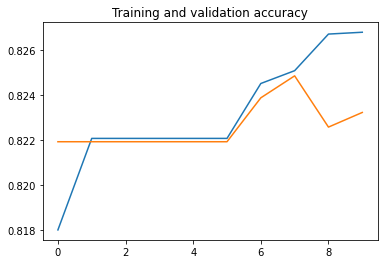

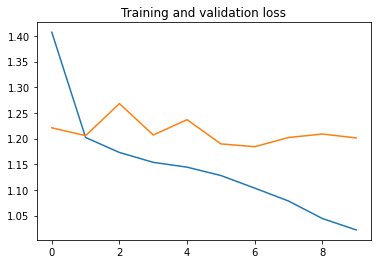

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

**MODEL 1 WITH SIMPLE RNN (5 UNITS) SEEMS TO BE DOING GOOD WITH BOTH TRAINING AND VALIDATION ACCURACY AROUND 80%**

**LETS TRAIN IT FOR MORE EPOCH **

EPOCHS =20

In [ ]:
history12=model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=20, batch_size=batch_size)

Epoch 1/20
384/384 [==============================] - 7s 17ms/step - loss: 1.0041 - accuracy: 0.8276 - val_loss: 1.2233 - val_accuracy: 0.8187
Epoch 2/20
384/384 [==============================] - 6s 16ms/step - loss: 0.9870 - accuracy: 0.8282 - val_loss: 1.1964 - val_accuracy: 0.8193
Epoch 3/20
384/384 [==============================] - 5s 14ms/step - loss: 0.9723 - accuracy: 0.8283 - val_loss: 1.1928 - val_accuracy: 0.8174
Epoch 4/20
384/384 [==============================] - 5s 14ms/step - loss: 0.9636 - accuracy: 0.8291 - val_loss: 1.2233 - val_accuracy: 0.8112
Epoch 5/20
384/384 [==============================] - 5s 13ms/step - loss: 0.9547 - accuracy: 0.8289 - val_loss: 1.2135 - val_accuracy: 0.8180
Epoch 6/20
384/384 [==============================] - 5s 13ms/step - loss: 0.9466 - accuracy: 0.8293 - val_loss: 1.2267 - val_accuracy: 0.8151
Epoch 7/20
384/384 [==============================] - 6s 16ms/step - loss: 0.9368 - accuracy: 0.8305 - val_loss: 1.2500 - val_accuracy: 0.8082

**WITH MORE EPOCHS TRAINING ACCURACY SEEMS TO BE SLIGHTLY INCREASING BUT VALIDATION ACCURACY DROPS , SO 10 EPOCHS IS OK HERE**

Text(0.5, 1.0, 'Training and validation loss')

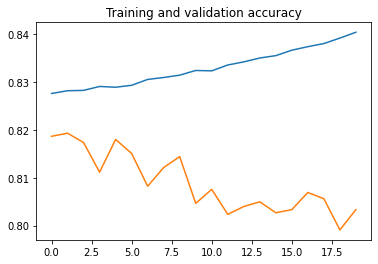

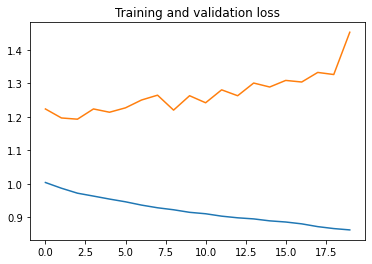

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history12.history['loss']
val_loss = history12.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

**WITH MORE EPOCHS VALIDATION LOSS INCREASES TOO**

**COMPILING MODEL 1 WITH A DIFFERENT OPTIMIZER (ADAM)**

In [ ]:
opt = optimizers.Adam()
model1.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])

In [ ]:
history13=model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=batch_size)

Epoch 1/10
384/384 [==============================] - 15s 30ms/step - loss: 0.8434 - accuracy: 0.8407 - val_loss: 1.3078 - val_accuracy: 0.8014
Epoch 2/10
384/384 [==============================] - 10s 26ms/step - loss: 0.8113 - accuracy: 0.8414 - val_loss: 1.3271 - val_accuracy: 0.8023
Epoch 3/10
384/384 [==============================] - 9s 24ms/step - loss: 0.7814 - accuracy: 0.8421 - val_loss: 1.3548 - val_accuracy: 0.7975
Epoch 4/10
384/384 [==============================] - 7s 17ms/step - loss: 0.7485 - accuracy: 0.8437 - val_loss: 1.4119 - val_accuracy: 0.7975
Epoch 5/10
384/384 [==============================] - 6s 16ms/step - loss: 0.7279 - accuracy: 0.8442 - val_loss: 1.3989 - val_accuracy: 0.8037
Epoch 6/10
384/384 [==============================] - 6s 16ms/step - loss: 0.7059 - accuracy: 0.8455 - val_loss: 1.4655 - val_accuracy: 0.7968
Epoch 7/10
384/384 [==============================] - 6s 15ms/step - loss: 0.6898 - accuracy: 0.8469 - val_loss: 1.5279 - val_accuracy: 0.79

Text(0.5, 1.0, 'Training and validation loss')

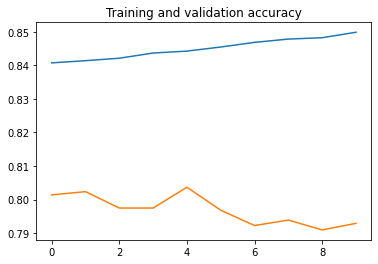

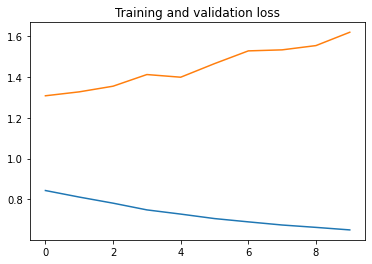

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history13.history['accuracy']
val_acc = history13.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history13.history['loss']
val_loss = history13.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

**Adam optimizer doesn't do well for this data set as training accuracy increases but validation accuracy drops**

**MODEL 2 = LSTM( 30 UNITS),RECURRENT_DROPOUT=0.2,DROPOUT = 0.2**
**OPTIMIZER = RMSPROP **

In [ ]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(max_features, 50 , input_length=seq_length))
model2.add(LSTM(units = 10,activation='relu',return_sequences = True,input_shape = [seq_length],recurrent_dropout = 0.2,dropout=0.2))

model2.add(tf.keras.layers.Flatten())
model2.add(Dense(110, activation='softmax'))



print(model2.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 50)            1000000   
                                                                 
 lstm_2 (LSTM)               (None, 10, 10)            2440      
                                                                 
 flatten_3 (Flatten)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 110)               11110     
                                                                 
Total params: 1,013,550
Trainable params: 1,013,550
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
opt = optimizers.RMSprop(learning_rate= 0.002)
model2.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])

In [ ]:
history2=model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=batch_size)

Epoch 1/10
384/384 [==============================] - 10s 19ms/step - loss: 1.3926 - accuracy: 0.8180 - val_loss: 1.2195 - val_accuracy: 0.8219
Epoch 2/10
384/384 [==============================] - 7s 18ms/step - loss: 1.1980 - accuracy: 0.8221 - val_loss: 1.1918 - val_accuracy: 0.8219
Epoch 3/10
384/384 [==============================] - 7s 18ms/step - loss: 1.1471 - accuracy: 0.8228 - val_loss: 1.1744 - val_accuracy: 0.8229
Epoch 4/10
384/384 [==============================] - 7s 18ms/step - loss: 1.1039 - accuracy: 0.8251 - val_loss: 1.1393 - val_accuracy: 0.8242
Epoch 5/10
384/384 [==============================] - 7s 18ms/step - loss: 1.0626 - accuracy: 0.8252 - val_loss: 1.1383 - val_accuracy: 0.8242
Epoch 6/10
384/384 [==============================] - 7s 18ms/step - loss: 1.0256 - accuracy: 0.8257 - val_loss: 1.1272 - val_accuracy: 0.8245
Epoch 7/10
384/384 [==============================] - 7s 18ms/step - loss: 0.9846 - accuracy: 0.8264 - val_loss: 1.1321 - val_accuracy: 0.826

Text(0.5, 1.0, 'Training and validation loss')

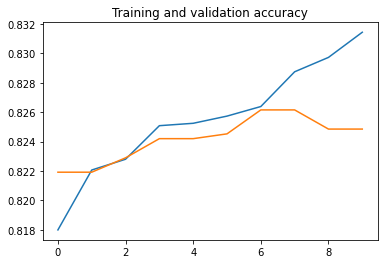

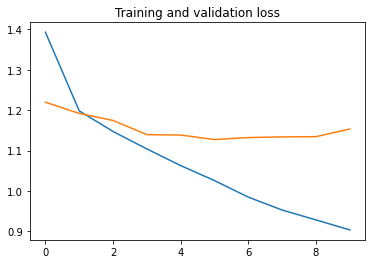

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

**MODEL 2 WITH LSTM UNITS 10 SEEMS TO BE DOING SIMILAR TO SIMPLE RNN (5 UNITS) WITH BOTH ACCURACY AROUND 80 %**

**MODEL 2 WITH MAX_FEATURES = 10000**

In [ ]:
max_features = 10000
seq_length = 10 # How long to make our word sequences
batch_size = 32

In [ ]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
sequences_X = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 10505 unique tokens.


In [ ]:
X_array = np.array(sequences_X)

print(type(X_array))


<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
X = pad_sequences(X_array, maxlen=seq_length)
print('shape of x',X.shape)

shape of x (15329, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=1010,shuffle=True,stratify=y)

In [ ]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(max_features, 50 , input_length=seq_length))
model2.add(LSTM(units = 30,activation='relu',return_sequences = True,input_shape = [seq_length],recurrent_dropout = 0.2,dropout=0.2))

model2.add(tf.keras.layers.Flatten())
model2.add(Dense(110, activation='softmax'))



print(model2.summary())
opt = optimizers.RMSprop(learning_rate= 0.002)
model2.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 10, 50)            500000    
                                                                 
 lstm_4 (LSTM)               (None, 10, 30)            9720      
                                                                 
 flatten_5 (Flatten)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 110)               33110     
                                                                 
Total params: 542,830
Trainable params: 542,830
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history21=model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=batch_size)

Epoch 1/10
384/384 [==============================] - 13s 26ms/step - loss: 1.3485 - accuracy: 0.8197 - val_loss: 1.2085 - val_accuracy: 0.8219
Epoch 2/10
384/384 [==============================] - 11s 29ms/step - loss: 1.1730 - accuracy: 0.8239 - val_loss: 1.1551 - val_accuracy: 0.8242
Epoch 3/10
384/384 [==============================] - 7s 17ms/step - loss: 1.0894 - accuracy: 0.8261 - val_loss: 1.1776 - val_accuracy: 0.8258
Epoch 4/10
384/384 [==============================] - 7s 18ms/step - loss: 1.0353 - accuracy: 0.8271 - val_loss: 1.2164 - val_accuracy: 0.8245
Epoch 5/10
384/384 [==============================] - 7s 18ms/step - loss: 0.9876 - accuracy: 0.8291 - val_loss: 1.1230 - val_accuracy: 0.8242
Epoch 6/10
384/384 [==============================] - 7s 18ms/step - loss: 0.9530 - accuracy: 0.8318 - val_loss: 1.1426 - val_accuracy: 0.8216
Epoch 7/10
384/384 [==============================] - 7s 18ms/step - loss: 0.9207 - accuracy: 0.8341 - val_loss: 1.1277 - val_accuracy: 0.82

Text(0.5, 1.0, 'Training and validation loss')

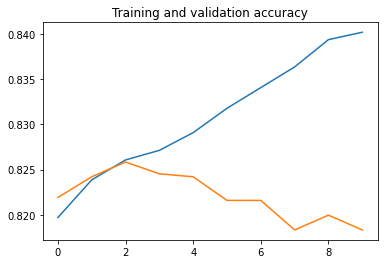

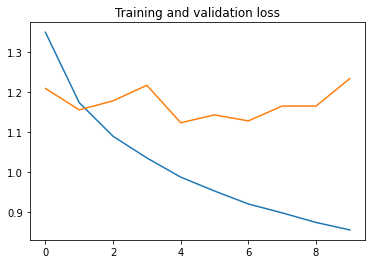

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history21.history['accuracy']
val_acc = history21.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history21.history['loss']
val_loss = history21.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

**DECREASING THE vocabulary SIZE FROM 20000 TO 10000 INCREASES TRAINING ACCURACY BUT VALIDATION ACCURACY DROPS**

**MODEL 3 WITH PRETRAINED WEIGHTS**

In [ ]:
# put your codes here
embeddings_index ={}
with open('glove.6B.100d.txt',encoding='utf8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    embeddings_index[word]=vector

In [ ]:
dog_vec = embeddings_index['dog']

print(dog_vec.shape)
dog_vec

(100,)


array([ 0.30817  ,  0.30938  ,  0.52803  , -0.92543  , -0.73671  ,
        0.63475  ,  0.44197  ,  0.10262  , -0.09142  , -0.56607  ,
       -0.5327   ,  0.2013   ,  0.7704   , -0.13983  ,  0.13727  ,
        1.1128   ,  0.89301  , -0.17869  , -0.0019722,  0.57289  ,
        0.59479  ,  0.50428  , -0.28991  , -1.3491   ,  0.42756  ,
        1.2748   , -1.1613   , -0.41084  ,  0.042804 ,  0.54866  ,
        0.18897  ,  0.3759   ,  0.58035  ,  0.66975  ,  0.81156  ,
        0.93864  , -0.51005  , -0.070079 ,  0.82819  , -0.35346  ,
        0.21086  , -0.24412  , -0.16554  , -0.78358  , -0.48482  ,
        0.38968  , -0.86356  , -0.016391 ,  0.31984  , -0.49246  ,
       -0.069363 ,  0.018869 , -0.098286 ,  1.3126   , -0.12116  ,
       -1.2399   , -0.091429 ,  0.35294  ,  0.64645  ,  0.089642 ,
        0.70294  ,  1.1244   ,  0.38639  ,  0.52084  ,  0.98787  ,
        0.79952  , -0.34625  ,  0.14095  ,  0.80167  ,  0.20987  ,
       -0.86007  , -0.15308  ,  0.074523 ,  0.40816  ,  0.0192

In [ ]:
for k,v in word_index.items():
      print(k)
      break

the


In [ ]:
embedding_matrix= np.zeros((len(word_index) + 1 ,100))

i=0
for k,v in word_index.items():
   i=i+1
   #print(k)
   embedding_vector=embeddings_index.get(k)
   if embedding_vector is not None:
      embedding_matrix[i, :] = embedding_vector
print(i)


10505


In [ ]:
print(embedding_matrix[:2,:])

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.     

In [ ]:
print(len(word_index))
print(seq_length)

10505
10


In [ ]:
# put your codes here
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(len(word_index) + 1,100, weights = [embedding_matrix], trainable = False, input_length=seq_length))
model3.add(LSTM(units = 10,activation='relu',return_sequences = True,input_shape = [10],recurrent_dropout = 0.2,dropout=0.2))


model3.add(tf.keras.layers.Flatten())
model3.add(Dense(110, activation='softmax'))



print(model3.summary())


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 100)           1050600   
                                                                 
 lstm_13 (LSTM)              (None, 10, 10)            4440      
                                                                 
 flatten_12 (Flatten)        (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 110)               11110     
                                                                 
Total params: 1,066,150
Trainable params: 15,550
Non-trainable params: 1,050,600
_________________________________________________________________
None


In [ ]:
opt = optimizers.RMSprop(learning_rate= 0.002)
model3.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])


In [ ]:
history3=model3.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=batch_size)

Epoch 1/10
384/384 [==============================] - 9s 15ms/step - loss: 1.4290 - accuracy: 0.8133 - val_loss: 1.1877 - val_accuracy: 0.8219
Epoch 2/10
384/384 [==============================] - 5s 14ms/step - loss: 1.1839 - accuracy: 0.8221 - val_loss: 1.1477 - val_accuracy: 0.8219
Epoch 3/10
384/384 [==============================] - 5s 14ms/step - loss: 1.1331 - accuracy: 0.8227 - val_loss: 1.1250 - val_accuracy: 0.8226
Epoch 4/10
384/384 [==============================] - 5s 14ms/step - loss: 1.1073 - accuracy: 0.8235 - val_loss: 1.1179 - val_accuracy: 0.8245
Epoch 5/10
384/384 [==============================] - 5s 14ms/step - loss: 1.0778 - accuracy: 0.8255 - val_loss: 1.1216 - val_accuracy: 0.8245
Epoch 6/10
384/384 [==============================] - 5s 14ms/step - loss: 1.0660 - accuracy: 0.8256 - val_loss: 1.1160 - val_accuracy: 0.8249
Epoch 7/10
384/384 [==============================] - 5s 14ms/step - loss: 1.0561 - accuracy: 0.8257 - val_loss: 1.1045 - val_accuracy: 0.8245

Text(0.5, 1.0, 'Training and validation loss')

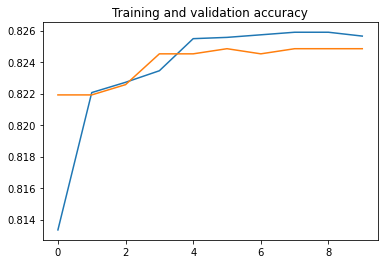

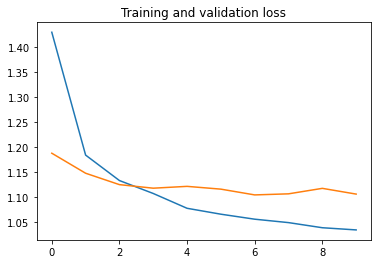

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

**MODEL 3 WITH PRETRAINED WEIGTS AND LSTM(10) UNITS HAS OVERALL ACCURACY OF ABOUT 82 % AND THERE IS ALMOST NO OVER FITTING**

**MODEL 3 WITH seq_length = 7**

In [ ]:
seq_length = 7

In [ ]:
print(max_features)

10000


In [ ]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
sequences_X = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 10505 unique tokens.


In [ ]:
X_array = np.array(sequences_X)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
X = pad_sequences(X_array, maxlen=seq_length)
print('shape of x',X.shape)

shape of x (15329, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=1010,shuffle=True,stratify=y)

In [ ]:
# put your codes here
model4 = tf.keras.Sequential()

model4.add(tf.keras.layers.Embedding(len(word_index) + 1,100, weights = [embedding_matrix], trainable = False, input_length=seq_length))
model4.add(LSTM(units =15,activation='relu',return_sequences = True,recurrent_dropout=0.2,dropout=0.2, input_shape = [7]))


model4.add(tf.keras.layers.Flatten())
model4.add(Dense(110, activation='softmax'))



print(model4.summary())


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 7, 100)            1050600   
                                                                 
 lstm_30 (LSTM)              (None, 7, 15)             6960      
                                                                 
 flatten_29 (Flatten)        (None, 105)               0         
                                                                 
 dense_29 (Dense)            (None, 110)               11660     
                                                                 
Total params: 1,069,220
Trainable params: 18,620
Non-trainable params: 1,050,600
_________________________________________________________________
None


In [ ]:
opt = optimizers.RMSprop(learning_rate= 0.002)
model4.compile(loss='categorical_crossentropy', optimizer=opt , metrics=['accuracy'])


In [ ]:
history4=model4.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=batch_size)

Epoch 1/10
384/384 [==============================] - 7s 11ms/step - loss: 1.4354 - accuracy: 0.8126 - val_loss: 1.1691 - val_accuracy: 0.8219
Epoch 2/10
384/384 [==============================] - 4s 11ms/step - loss: 1.1783 - accuracy: 0.8221 - val_loss: 1.1388 - val_accuracy: 0.8219
Epoch 3/10
384/384 [==============================] - 4s 11ms/step - loss: 1.1315 - accuracy: 0.8221 - val_loss: 1.1066 - val_accuracy: 0.8219
Epoch 4/10
384/384 [==============================] - 4s 11ms/step - loss: 1.0953 - accuracy: 0.8223 - val_loss: 1.0972 - val_accuracy: 0.8229
Epoch 5/10
384/384 [==============================] - 4s 11ms/step - loss: 1.0668 - accuracy: 0.8226 - val_loss: 1.0901 - val_accuracy: 0.8229
Epoch 6/10
384/384 [==============================] - 4s 10ms/step - loss: 1.0462 - accuracy: 0.8229 - val_loss: 1.0872 - val_accuracy: 0.8242
Epoch 7/10
384/384 [==============================] - 4s 10ms/step - loss: 1.0301 - accuracy: 0.8241 - val_loss: 1.0791 - val_accuracy: 0.8242

Text(0.5, 1.0, 'Training and validation loss')

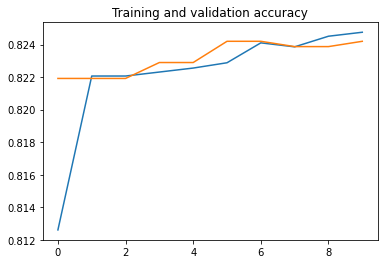

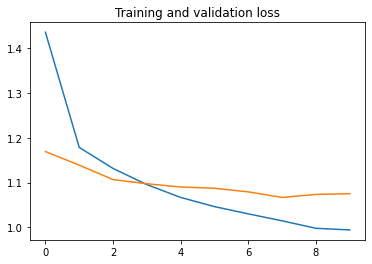

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

**CHANGING THE SEQ_LENGTH TO 7 DOESN'T IMPACT THE MODEL MUCH**

**INCREASING THE NUMBER OF LSTM UNITS OR EPOCHS OR CHANGING BATCH SIZE RESULTS IN A POOR PERFORMANCE FOR THIS DATA**

CONCLUSION:
THE DATA SET USED HERE IS A SIMPLE ONE WITH 15329 SAMPLES.
SO, FOR THIS KEEPING THE VOCUBULARY_SIZE AND SEQ_LENGTH IN LOW COUNT HELPS IN BETTER PERFORMANCE.
EVEN SIMPLE RNN OR LSTM WITH LESS UNITS LIKE 5 OR 10 PERFORMS WELL

MODEL 1 AND MODEL 4 DO WELL, ACCURACY AROUND 80%

MODEL 4 WITH PRETRAINED WEIGHTS WITH LESS LSTM UNITS,DOES WELL AROUND 82% AND THIS MODEL DO NOT HAVE MUCH OVERFITTING ISSUES